In [1]:
import pandas as pd
import glob

file_pattern = 'BTC-*.csv'  
file_list = glob.glob(file_pattern)

dataframes = [pd.read_csv(file) for file in file_list]
merged_data = pd.concat(dataframes, ignore_index=True)

print(merged_data.head())


         unix                 date   symbol      open      high       low  \
0  1514764740  2017-12-31 23:59:00  BTC/USD  13913.28  13913.28  13867.18   
1  1514764680  2017-12-31 23:58:00  BTC/USD  13913.26  13953.83  13884.69   
2  1514764620  2017-12-31 23:57:00  BTC/USD  13908.73  13913.26  13874.99   
3  1514764560  2017-12-31 23:56:00  BTC/USD  13827.00  13908.69  13827.00   
4  1514764500  2017-12-31 23:55:00  BTC/USD  13825.05  13825.05  13825.05   

      close  Volume BTC    Volume USD  
0  13880.00    0.591748   8213.456549  
1  13953.77    1.398784  19518.309658  
2  13913.26    0.775012  10782.944294  
3  13859.58    0.666459   9236.841134  
4  13825.05    0.065501    905.560130  


In [2]:
merged_data.to_csv('BTC_merged.csv', index=False)

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('BTC_merged.csv')

data = df.iloc[:, 3:4].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

X = []
y = []

for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])  
    y.append(scaled_data[i, 0])       

X, y = np.array(X), np.array(y)

X = np.reshape(X, (X.shape[0], X.shape[1], 1)) 

df.columns

Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],
      dtype='object')

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)))

model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(units=50, activation='relu'))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=5, batch_size=32)


Epoch 1/2
66881/66881 [==============================] - 165s 2ms/step - loss: 3.9088e-06
Epoch 2/2
66881/66881 [==============================] - 163s 2ms/step - loss: 1.3848e-06


In [15]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

mse_manual = mean_squared_error(y_test, y_pred)

print(f"MSE: {mse_manual}")


16721/16721 [==============================] - 22s 1ms/step
MSE: 3.9191823311443845e-06


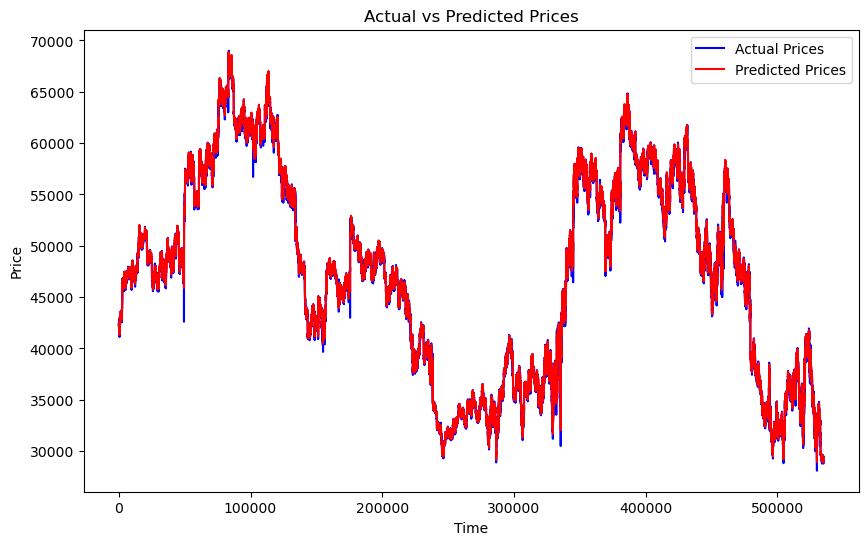

In [14]:
import matplotlib.pyplot as plt

y_test_scaled_back = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_scaled_back = scaler.inverse_transform(y_pred)

plt.figure(figsize=(10,6))
plt.plot(y_test_scaled_back, color='blue', label='Actual Prices')
plt.plot(y_pred_scaled_back, color='red', label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()